# Jaynes-Cummings Model

Sources:
- https://hodgestar.github.io/qutip-asqsqis-2022/tutorials/03-qutip-jcm-i.html

The Jaynes-Cummings model describes a two-level system (TLS) interacting with a single EM mode in a cavity. It demonstrates quantization of an EM field in a given volume (in this case defined by the cavity). It is given by the following Hamiltonian:

$$\hat{H} = \hat{H_A}+\hat{H_L}+\hat{H_I}$$

- $\hat{H_A} = \hbar \omega_a \hat{\sigma^+} \hat{\sigma^-}= \hbar \omega_a \ket{2}\bra{2}$ (atom/TLS Hamiltonian)
  - Note: here we are just making an energy offset so the energy of the ground state is 0. This means $\hat{H}_{atom}=0\ket{1}\bra{1} + \hbar \omega_a \ket{2}\bra{2}$
- $\hat{H_L} = \hbar \omega_c (a^\dagger a)$ (light Hamiltonian)
- $\hat{H_I} =  \hbar g(a^\dagger + a)(\sigma_- + \sigma_+)$ (interaction Hamiltonian)

where $g$ is the coupling, $\omega_a$ is the atomic transition frequency, $\omega_c$ is cavity mode frequency and $a$ and $a^\dagger$ are the annihilation and creation operators of the cavity respectively.

The atom Hamiltonian can take different forms.

Under the rotating-wave approximation (assume non-energy conserving terms/interactions are negligible (states far apart in energy do not couple)):

$$H_{\rm I} \approx \hbar g(\sigma^+a + \sigma^-a^\dagger)$$

where $\sigma_-$ and $\sigma_+$ are the annihilation and creation operators for the atom respectively.


In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import qutip
import numpy as np

We define our operators in terms of tensor products:

$\hat{a} = \{\ket{0}, \ket{1}, ... \ket{n}\}\otimes \{\ket{g}, \ket{e}\}$ 

$\hat{\sigma} =\{\ket{g}, \ket{e}\} \otimes \{\ket{0}, \ket{1}, ... \ket{n}\}$ 

Note that becomes we are now considering composite states (tensor product yields new Hilbert space), our operators must be defined with:
- $\hat{a} = \hat{a}_s \otimes I_2$
- $\hat{\sigma}_- = I_N \otimes \hat{\sigma}_-^s$
- $\hat{\sigma}_+ = \sigma_-^\dagger= I_N \otimes \hat{\sigma}_+^s$

where the super/subscript $s$ defines the previous operators without the existence of the other space.

In [ ]:
# SYSTEM PARAMETERS
wc = 1.0 * 2 * np.pi  # cavity frequency
wa = 1.0 * 2 * np.pi  # atom frequency
g = 0.05 * 2 * np.pi  # coupling strength
N = 2  # number of cavity fock states

# OPERATORS
a = qutip.tensor(qutip.destroy(N), qutip.qeye(2)) # Annihilation operator for cavity (acts trivally on the atom) 
atom = qutip.tensor(qutip.qeye(N), qutip.sigmap()*qutip.sigmam())
sm = qutip.tensor(qutip.qeye(N), qutip.sigmam()) # Annihilation operator for the atom (acts trivally on the cavity)
sp = qutip.tensor(qutip.qeye(N), qutip.sigmap())

In [124]:
""" Jaynes-Cummings Hamiltonian (non-RWA). """
def jcm_h(wc, wa, g, N):
    H = wa*atom  + wc*a.dag()*a + g*(a.dag()+a)*(sm+sp) # H_A + H_L + H_I
    return H

""" Jaynes-Cummings Hamiltonian with RWA. """
def jcm_rwa_h(wc, wa, g, N):
    H = wa*atom + wc*a.dag()*a + g*(sm*a.dag()+sp*a)
    return H

### Now that we have created our Hamiltonian, let's simulate the system via Schrodinger equation (time evolution).

We will start our system with no photons and the TLS in the excited state

In [152]:
# initial state
psi0 = qutip.basis([N, 2], [0, 0])  # start with an excited atom + no photons
psi0

Quantum object: dims=[[2, 2], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]
 [0.]
 [0.]]

In [165]:
psi0 = qutip.tensor(qutip.basis(2,0), qutip.states.coherent(N, 1))
print(psi0)

Quantum object: dims=[[2, 2], [1]], shape=(4, 1), type='ket', dtype=Dense
Qobj data =
[[0.54030231]
 [0.84147098]
 [0.        ]
 [0.        ]]


In [155]:
qutip.basis(2,0)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]

(0.0, 1.0)

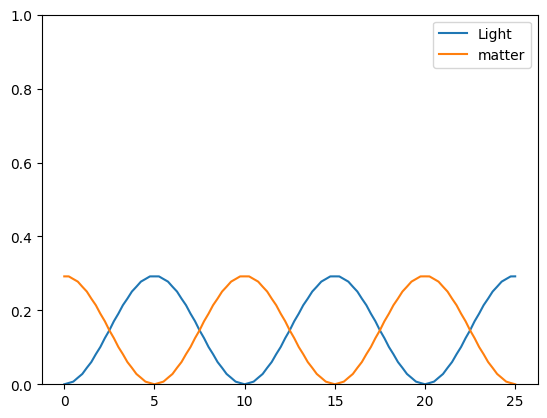

In [162]:
# Operators to determine the expectation values of:
eop_a = a.dag() * a  # light
eop_sm = sm.dag()*sm  # atom

# Solve Schrodinger's equation using sesolve (currently using non-RWA Hamiltonian)
tlist = np.linspace(0, 25, 101)
H = jcm_h(wc, wa, g, N)
result = qutip.sesolve(H, psi0, tlist, e_ops=[eop_a, eop_sm])

plt.plot(tlist, result.expect[0], label="Light")
plt.plot(tlist, result.expect[1], label="matter")
plt.legend(); plt.ylim([0, 1])

In [ ]:
#display_eigenstates(H)

As we increase $g$, we notice that the oscillations increase in frequency. This intuitively makes sense because the absorption/emission process is "easier" (?).

(0.0, 1.0)

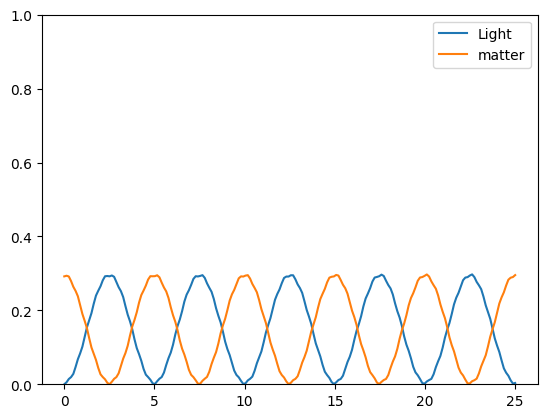

In [163]:
H = jcm_h(wc, wa, 2*g, N)
tlist = np.linspace(0, 25, 200)
result = qutip.sesolve(H, psi0, tlist, e_ops=[eop_a, eop_sm])

plt.plot(tlist, result.expect[0], label="Light")
plt.plot(tlist, result.expect[1], label="matter")
plt.legend(); plt.ylim([0, 1])

## Compare RWA with non-RWA

(0.0, 1.0)

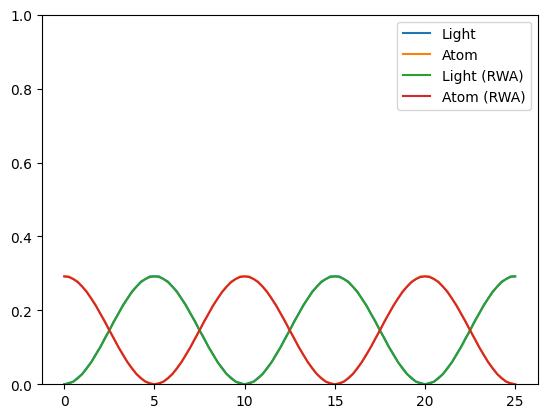

In [161]:
H = jcm_h(wc, wa, g, N)
H_RWA = jcm_rwa_h(wc, wa, g, N)

# Hmm. The results look the same.
tlist = np.linspace(0, 25, 101)

result = qutip.sesolve(H, psi0, tlist, e_ops=[eop_a, eop_sm])
plt.plot(tlist, result.expect[0], label="Light")
plt.plot(tlist, result.expect[1], label="Atom")

result_rwa = qutip.sesolve(H_RWA, psi0, tlist, e_ops=[eop_a, eop_sm])
plt.plot(tlist, result_rwa.expect[0], label="Light (RWA)")
plt.plot(tlist, result_rwa.expect[1], label="Atom (RWA)")
plt.legend(); plt.ylim([0, 1])

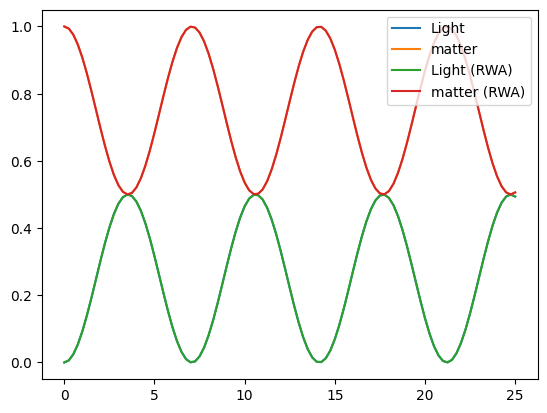

In [129]:
# Try with different frequencies w_c and w_a:
tlist = np.linspace(0, 25, 101)
f = 0.9

H = jcm_h(wc, f*wa, g, N)
H_RWA = jcm_rwa_h(wc, f*wa, g, N)

result = qutip.sesolve(H, psi0, tlist, e_ops=[eop_a, eop_sm])
plt.plot(tlist, result.expect[0], label="Light")
plt.plot(tlist, result.expect[1], label="matter")

result_rwa = qutip.sesolve(H_RWA, psi0, tlist, e_ops=[eop_a, eop_sm])
plt.plot(tlist, result_rwa.expect[0], label="Light (RWA)")
plt.plot(tlist, result_rwa.expect[1], label="matter (RWA)")
plt.legend()

In [ ]:
# Demonstrate this on the Bloch sphere?

Sources:
- https://phas.ubc.ca/~berciu/TEACHING/PHYS502/PROJECTS/20-JC-AA.pdf
- https://hodgestar.github.io/qutip-asqsqis-2022/student-tutorials/03-qutip-jcm-i.html
